## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Mashfuk Hossain\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2/2 [==============================] - 172s 118s/step - loss: 5.2637 - accuracy: 0.2604 - val_loss: 5.6241 - val_accuracy: 0.1724
Epoch 2/10
2/2 [==============================] - 145s 106s/step - loss: 4.5489 - accuracy: 0.4375 - val_loss: 4.1380 - val_accuracy: 0.5172
Epoch 3/10
2/2 [==============================] - 124s 88s/step - loss: 7.1768 - accuracy: 0.4062 - val_loss: 4.6002 - val_accuracy: 0.3276
Epoch 4/10
2/2 [==============================] - 111s 70s/step - loss: 6.5753 - accuracy: 0.3958 - val_loss: 2.0506 - val_accuracy: 0.6207
Epoch 5/10
2/2 [==============================] - 97s 74s/step - loss: 3.5456 - accuracy: 0.4583 - val_loss: 5.0805 - val_accuracy: 0.1552
Epoch 6/10
2/2 [==============================] - 115s 80s/step - loss: 4.0993 - accuracy: 0.3854 - val_loss: 5.6347 - val_accuracy: 0.1552
Epoch 7/10
2/2 [==============================] - 102s 76s/step - loss: 2.7916 - accuracy: 0.4792 - val_loss: 2.3785 - val_accuracy: 0.3276
Epoch 8/10
2/2 [===

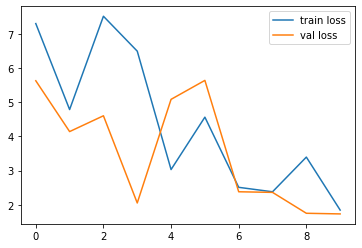

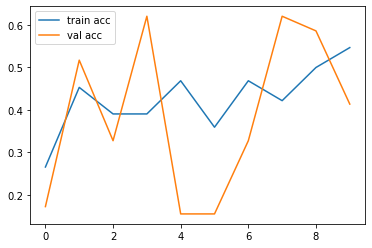

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[3.5267134e-04, 7.1521456e-05, 9.9957579e-01],
       [2.6998407e-01, 4.4252077e-01, 2.8749511e-01],
       [2.8499786e-02, 1.2669832e-02, 9.5883042e-01],
       [2.1346247e-01, 5.2923488e-04, 7.8600836e-01],
       [5.5095470e-01, 1.3814960e-01, 3.1089571e-01],
       [1.7716561e-01, 8.2697600e-02, 7.4013674e-01],
       [3.1940624e-02, 9.0428349e-03, 9.5901656e-01],
       [2.0292020e-01, 1.8458672e-01, 6.1249310e-01],
       [6.9259495e-02, 1.0611657e-01, 8.2462394e-01],
       [1.5772718e-01, 3.6655463e-02, 8.0561733e-01],
       [1.9685888e-01, 3.1880900e-02, 7.7126020e-01],
       [6.6803366e-01, 7.6664187e-02, 2.5530219e-01],
       [1.4788888e-03, 4.9478490e-06, 9.9851614e-01],
       [4.2130813e-01, 9.9863680e-03, 5.6870556e-01],
       [1.6783398e-01, 1.0310662e-01, 7.2905934e-01],
       [9.5330343e-02, 1.8809979e-03, 9.0278864e-01],
       [5.7059342e-01, 6.7075137e-03, 4.2269909e-01],
       [3.4184259e-01, 6.4365298e-02, 5.9379208e-01],
       [9.2179304e-01, 4.531

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img_data

NameError: name 'img_data' is not defined

In [23]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [24]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[4.0362342e-04, 8.7892593e-05, 9.9950850e-01]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a==1

array([False])